# Implementazione DCT e confronto

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
import numpy as np
from scipy.fft import dct, dctn, idctn
import time
import math

%matplotlib inline

Definiamo una funzione custom DCT, utilizzando la formula:

$$
c_k=a_k^N\sum_{i=0}^{N-1}f_i\cos\left(k\pi\frac{2i+1}{2N}\right)\mbox{ } \forall k\in[0,N-1]
$$

Costruiamo poi la funzione DCT2 applicando la DCT1 per righe e per colonne.

In [3]:
#definizione dct
def my_dct(f):
  c = np.zeros(f.size)
  N = f.size
  for k in range(N):
    sum = 0
    a = math.sqrt(1. / N) if k == 0 else math.sqrt(2. / N)
    for i in range(N):
      sum += f[i] * math.cos((k * math.pi * (2 * i + 1)) / (2 * N))
    c[k] = a * sum
  return c

#definizione dct2, chiamando la dct su righe e colonne
def my_dct2(m):
  c = np.zeros(m.shape)
  c = np.apply_along_axis(my_dct, axis=1, arr=m)
  c = np.apply_along_axis(my_dct, axis=0, arr=c)
  return c

In [4]:
TEST_DCT = np.array([231,  32, 233, 161,  24,  71, 140, 245])

c = my_dct(TEST_DCT)

TEST_DCT_RESULT = np.array([ 401.9902051 ,    6.60001991,  109.16736544, -112.78557857,
         65.40737726,  121.83139804,  116.65648855,   28.80040722])

TEST_DCT_RESULT = dct(TEST_DCT, norm='ortho')

if np.equal(c.all(), TEST_DCT_RESULT.all()):
  print("DCT1 test passato")
else:
  print("DCT1 test non passato")


DCT1 test passato


In [5]:
TEST_DCT2 = np.array([[231,  32, 233, 161,  24,  71, 140, 245],
                     [247,  40, 248, 245, 124, 204,  36, 107],
                     [234, 202, 245, 167,   9, 217, 239, 173],
                     [193, 190, 100, 167,  43, 180,   8,  70],
                     [ 11,  24, 210, 177,  81, 243,   8, 112],
                     [ 97, 195, 203,  47, 125, 114, 165, 181],
                     [193,  70, 174, 167,  41,  30, 127, 245],
                     [ 87, 149,  57, 192,  65, 129, 178, 228]])

c2 = my_dct2(TEST_DCT2)

TEST_DCT2_RESULT = np.array([[ 1.11875000e+03,  4.40221926e+01,  7.59190503e+01,
        -1.38572411e+02,  3.50000000e+00,  1.22078055e+02,
         1.95043868e+02, -1.01604906e+02],
       [ 7.71900790e+01,  1.14868206e+02, -2.18014421e+01,
         4.13641351e+01,  8.77720598e+00,  9.90829620e+01,
         1.38171516e+02,  1.09092795e+01],
       [ 4.48351537e+01, -6.27524464e+01,  1.11614114e+02,
        -7.63789658e+01,  1.24422160e+02,  9.55984194e+01,
        -3.98287969e+01,  5.85237670e+01],
       [-6.99836647e+01, -4.02408945e+01, -2.34970508e+01,
        -7.67320594e+01,  2.66457750e+01, -3.68328290e+01,
         6.61891485e+01,  1.25429731e+02],
       [-1.09000000e+02, -4.33430857e+01, -5.55436908e+01,
         8.17347083e+00,  3.02500000e+01, -2.86602437e+01,
         2.44149822e+00, -9.41437025e+01],
       [-5.38783591e+00,  5.66345009e+01,  1.73021519e+02,
        -3.54234494e+01,  3.23878249e+01,  3.34576728e+01,
        -5.81167864e+01,  1.90225615e+01],
       [ 7.88439693e+01, -6.45924096e+01,  1.18671203e+02,
        -1.50904840e+01, -1.37316928e+02, -3.06196663e+01,
        -1.05114114e+02,  3.98130497e+01],
       [ 1.97882438e+01, -7.81813409e+01,  9.72311860e-01,
        -7.23464180e+01, -2.15781633e+01,  8.12999035e+01,
         6.37103782e+01,  5.90618071e+00]])

TEST_DCT2_RESULT = dctn(TEST_DCT2, norm='ortho')

if np.equal(c2.all(), TEST_DCT2_RESULT.all()):
  print("DCT2 test passato")
else:
  print("DCT2 test non passato")


DCT2 test passato


In [6]:
#test performance my_dct2 vs scipy dctn
time_custom_array = []
time_scipy_array = []
n_array = []
for N in range(10, 100+1, 10):
  img = np.random.uniform(low=0.0, high=255.0, size=(N, N))
  n_array.append(N)

  start = time.perf_counter()
  custom_res = my_dct2(img)
  stop = time.perf_counter()
  time_custom = stop - start
  
  time_custom_array.append(time_custom)

  start = time.perf_counter()
  scipy_res = dctn(img, norm='ortho')
  stop = time.perf_counter()
  time_scipy = stop - start

  time_scipy_array.append(time_scipy)

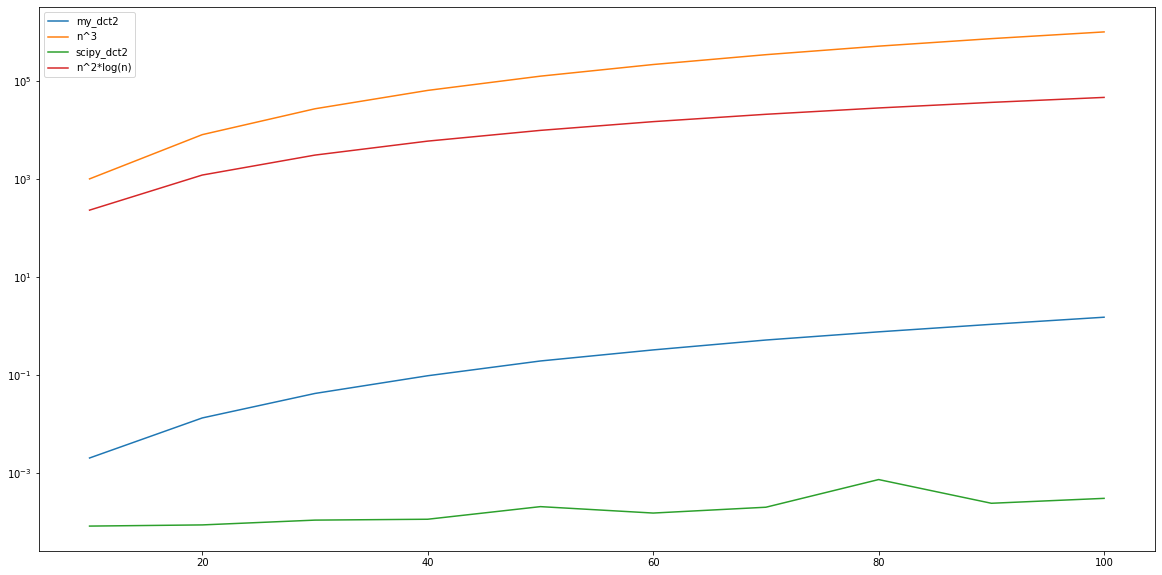

In [8]:
#plot tempi
def power(my_list, degree):
    return [ x**degree for x in my_list ]

def powerlog(my_list, degree):
    return [ x**degree*math.log(x) for x in my_list ]

n_3 = power(n_array, 3)
n_2 = powerlog(n_array, 2)

rcParams['figure.figsize'] = 20 ,10

fig = plt.figure()
ax = plt.axes()

ax.set_yscale('log')
ax.plot(n_array, time_custom_array, label='my_dct2')
ax.plot(n_array, n_3, label='n^3')
ax.plot(n_array, time_scipy_array, label='scipy_dct2')
ax.plot(n_array, n_2, label='n^2*log(n)')
ax.legend()

plt.savefig('dct_comparison.png', bbox_inches='tight')